In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import re
import time
from datetime import datetime, timedelta
from pandas.tseries.offsets import *
import locale
locale.setlocale(locale.LC_TIME, "de_DE.UTF-8")

%matplotlib inline

In [2]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'patch.facecolor': '#C5C6C8',
    'patch.edgecolor': '#C5C6C8',
    'patch.antialiased': True,
    'font.size': 10.0,
    #'font.family': 'Futura',
    'axes.facecolor': '#C5C6C8',
    'axes.edgecolor': '#C5C6C8',
    'axes.linewidth': '1',
    'axes.grid': False,
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.labelcolor': 'black',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#002458', '#01388B', '#0474BC', '#009DE0', '#004318', '#016B29', '#6AAF21', '#BCCD02', '#013646', '#015764', '#017783', '#0198A1', '#570B56', '#7A0B69', '#E30059', '#700D10', '#940D13', '#EF7F01', '#FDCC03']),
    'xtick.color': 'black',
    'xtick.direction': 'out',
    'ytick.color': 'black',
    'ytick.direction': 'out',
    'grid.color': 'C5C6C8',
    'grid.linestyle': '-',
    'figure.facecolor': 'C5C6C8',
    'savefig.bbox' : 'tight'
})

In [3]:
df = pd.read_csv('speedtest_sorted.csv')

In [4]:
df.dtypes

date                     object
download                float64
test_server              object
test_server_distance    float64
test_server_latency     float64
test_server_location     object
upload                  float64
dtype: object

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

date                    datetime64[ns]
download                       float64
test_server                     object
test_server_distance           float64
test_server_latency            float64
test_server_location            object
upload                         float64
dtype: object

In [7]:
df.head()

,date,download,test_server,test_server_distance,test_server_latency,test_server_location,upload
0,2016-12-04 06:24:55,54.13,wilhelm.tel,0.0,31.589,Norderstedt,5.33
1,2016-12-04 21:30:01,49.51,C&S Breitband GmbH,0.0,31.824,Bad Oldesloe,5.33
2,2016-12-04 21:40:02,51.08,C&S Breitband GmbH,0.0,30.336,Bad Oldesloe,5.44
3,2016-12-04 21:50:02,49.49,wilhelm.tel,0.0,31.136,Norderstedt,5.32
4,2016-12-04 22:00:01,49.71,C&S Breitband GmbH,0.0,30.492,Bad Oldesloe,5.49


In [8]:
df[df.date < '1970']

,date,download,test_server,test_server_distance,test_server_latency,test_server_location,upload


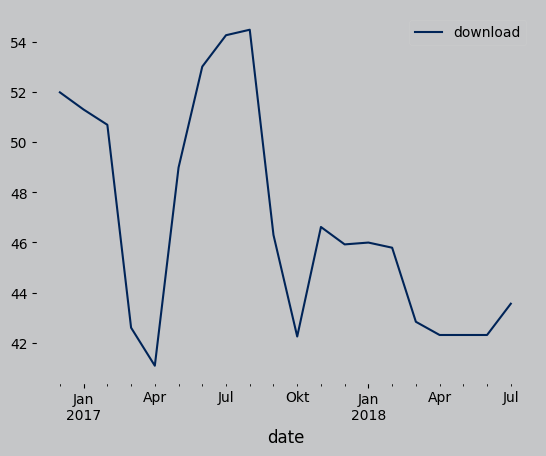

In [9]:
ax = df.resample('M', on='date').download.mean().fillna(method='ffill', limit=2)
ax = ax.reset_index().plot(x='date', y='download')
plt.show()

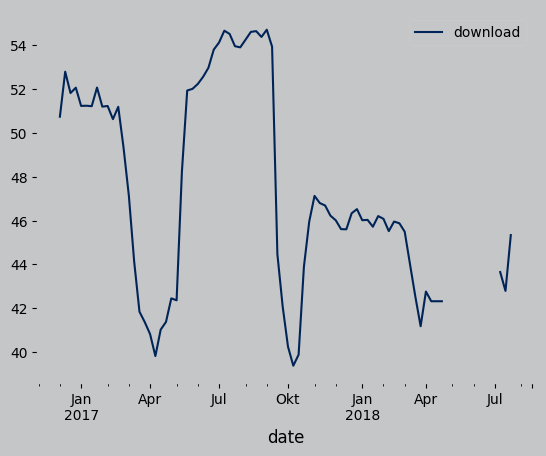

In [10]:
ax = df.resample('W', on='date').download.mean().fillna(method='ffill', limit=2)
ax = ax.reset_index().plot(x='date', y='download')
plt.show()

In [11]:
df.head(100).resample('D', on='date').mean().download

date
2016-12-04    50.736250
2016-12-05    52.947857
2016-12-06    51.497083
2016-12-07    53.237083
2016-12-08    54.175000
Freq: D, Name: download, dtype: float64

In [12]:
temp = pd.DatetimeIndex(df.date)
df['weekday'] = temp.weekday

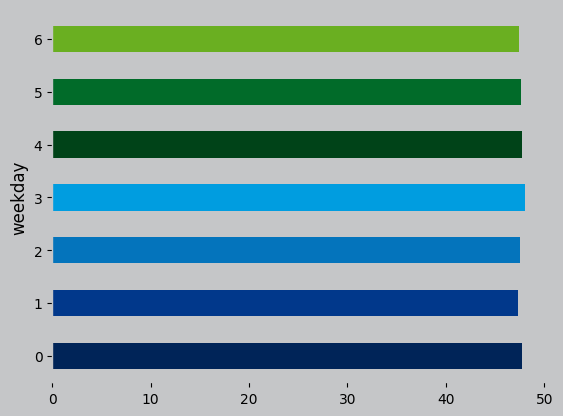

In [13]:
df.groupby('weekday').download.mean().plot(kind='barh')
plt.show()